In [1]:
import pandas as pd

In [2]:
#open files
grom =  pd.read_csv('grom/majorgrom.csv', sep=',')

In [5]:
#checking for duplicates
grom.duplicated().sum()

0

In [4]:
#drop duplicates with the same story link
grom = grom.drop_duplicates(subset=['Storylink'])

In [6]:
#re-indexing after dropping
grom = grom.reset_index(drop=True)

In [7]:
#change postdate to date format
grom['Postdate'] = pd.to_datetime(grom['Postdate'])

In [8]:
grom.to_csv("grom_df.csv", sep=',', index=False)

**PLOT NUM Of STORIES BY YEAR**

<AxesSubplot:xlabel='Postdate'>

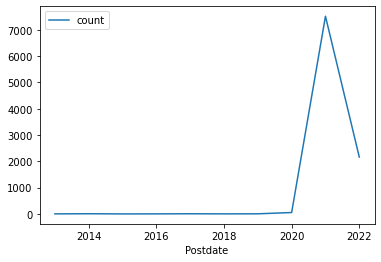

In [9]:
#plot by month
grom['Title'].groupby([grom['Postdate'].dt.year]).agg({'count'}).plot()

In [10]:
#counting number of tags per fanfic
grom['Tags_Count'] = grom['Tags'].apply(lambda x: x.count('|')+1)

**average number of tags per story**

In [11]:
grom['Tags_Count'].mean()

8.37691992627483

In [12]:
grom.groupby([grom['Postdate'].dt.year])['Tags_Count'].mean()

Postdate
2013     4.666667
2014     4.125000
2015     6.000000
2016     5.333333
2017     5.142857
2018     4.000000
2019    13.800000
2020     6.277778
2021     7.940418
2022     9.976884
Name: Tags_Count, dtype: float64

<AxesSubplot:xlabel='Postdate'>

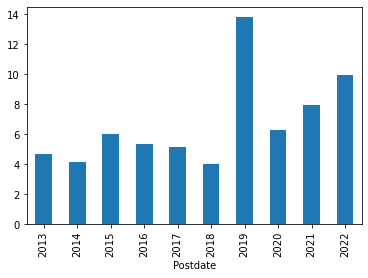

In [13]:
grom.groupby([grom['Postdate'].dt.year])['Tags_Count'].mean().plot.bar()

<AxesSubplot:xlabel='Postdate'>

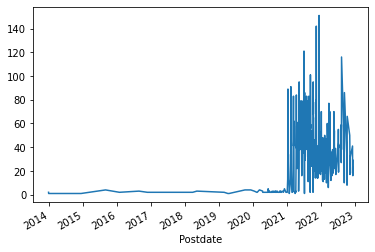

In [20]:
grom.groupby('Postdate')['Fandom_Count'].sum().plot()

**NUMBER OF FANDOMS**

In [15]:
#counting number of fandoms per fanfic
grom['Fandom_Count'] = grom['Fandom'].apply(lambda x: x.count(',')+1)

In [16]:
grom['Fandom_Count'].mean()

1.8375998361662913

<AxesSubplot:xlabel='Postdate'>

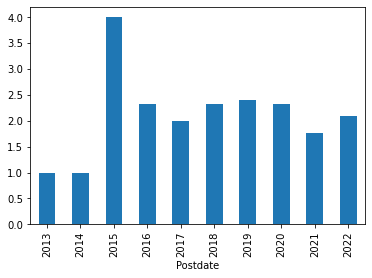

In [17]:
#sample few stories from 2015
grom.groupby([grom['Postdate'].dt.year])['Fandom_Count'].mean().plot.bar()

<AxesSubplot:xlabel='Postdate'>

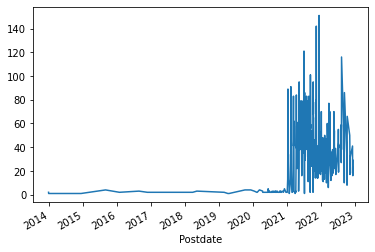

In [19]:
grom.groupby('Postdate')['Fandom_Count'].sum().plot()

**NUMBER OF CHARACTERS AND PAIRINGS**

In [21]:
grom['Charships'] = grom['Charships'].astype('str')

In [22]:
grom['Char_Count'] = grom['Charships'].apply(lambda x: x.count(',')+1)

In [23]:
grom['Char_Count'].mean()

2.569526930165882

<AxesSubplot:xlabel='Postdate'>

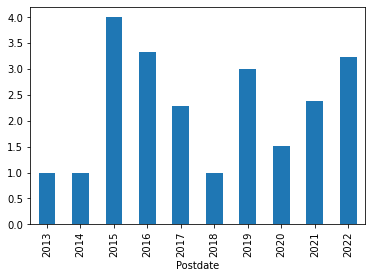

In [24]:
grom.groupby([grom['Postdate'].dt.year])['Char_Count'].mean().plot.bar()

<AxesSubplot:xlabel='Postdate'>

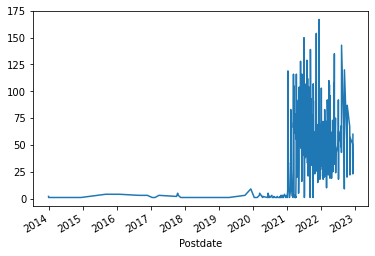

In [25]:
grom.groupby('Postdate')['Char_Count'].sum().plot()